In [2]:
pip install array-record

In [1]:
import tensorflow as tf

In [3]:
dataset_dir="rt1_data"

In [4]:
import array_record

# Path to your array-record file
file_path = 'RT_1_paper_release-train.array_record-00000-of-01024'

# Open and access the dataset using the correct array_record loader
dataset = tf.data.TFRecordDataset(filenames=[file_path])

# Iterate through the records and print them
for idx, record in enumerate(dataset_dir):
    print(f"Record {idx}: {record}")

Record 0: r
Record 1: t
Record 2: 1
Record 3: _
Record 4: d
Record 5: a
Record 6: t
Record 7: a


In [5]:
import tensorflow_datasets as tfds

aa = tfds.builder_from_directory('rt1_data')

In [6]:
builder = aa
dataset = builder.as_data_source()

In [7]:
instance = dataset['train']
info = instance.dataset_info

In [8]:
instance.data_source

ArrayRecordDataSource(hash_of_paths=7df058f472993f62d36103d6a1f3bd609d626177)

In [9]:
if isinstance(instance[0]['steps'], list) and len(instance[0]['steps']) > 0:
    # Assuming 'observation' is a dictionary within the first element of 'steps':
    if isinstance(instance[0]['steps'][0], dict) and 'observation' in instance[0]['steps'][0]:
        # Assuming 'image' is a key in the 'observation' dictionary:
        if 'image' in instance[0]['steps'][0]['observation']:
            image_data = instance[0]['steps'][0]['observation']['image']
            print(image_data)
        else:
            print("Error: 'image' key not found in 'observation'")
    else:
        print("Error: 'observation' key not found or not a dictionary in the first element of 'steps'")
else:
    print("Error: 'steps' is not a list or is empty")

Error: 'steps' is not a list or is empty


In [10]:
import pprint

# Print the keys of instance[0] to understand its structure:
print(instance[0].keys())

# Use pprint to display the content of instance[0] in a more readable format:
pprint.pprint(instance[0])

# Assuming there's an element with a key like "observation" or similar:
if 'observation' in instance[0]:
    observation_data = instance[0]['observation']
    # Print the keys of the 'observation' data:
    print(observation_data.keys())
    # Try accessing the 'image' data from 'observation':
    if 'image' in observation_data:
        image_data = observation_data['image']
        print(image_data)
    else:
        print("Error: 'image' key not found in 'observation'")
else:
    print("Error: 'observation' key not found in instance[0]")

dict_keys(['steps'])
{'steps': PythonDataSource(length=73)}
Error: 'observation' key not found in instance[0]


In [11]:
import pprint
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt  # Import for potential visualization

def process_images_in_steps(steps_data, save_dir="original_images"):
    # Create the directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    original_images = []

    for step_index, step_data in enumerate(steps_data):
        if 'observation' in step_data and 'image' in step_data['observation']:
            image_data = step_data['observation']['image']

            # Debugging: Print image data and shape/dtype (if ndarray)
            print(f"Step {step_index}:")
            print(image_data)
            if isinstance(image_data, np.ndarray):
                print(f"  Image data shape: {image_data.shape}")
                print(f"  Image data dtype: {image_data.dtype}")

            try:
                # Load original image using PIL, with potential mode adjustments
                if isinstance(image_data, np.ndarray):
                    if image_data.ndim == 2:  # Grayscale
                        original_img = Image.fromarray(image_data.astype(np.uint8), mode='L')
                    elif image_data.ndim == 3 and image_data.shape[2] == 3:  # RGB
                        original_img = Image.fromarray(image_data.astype(np.uint8), mode='RGB')
                    else:
                        raise ValueError("Unsupported image data shape")
                else:
                    original_img = Image.fromarray(np.array(image_data))  # Default

                original_images.append(original_img)

                # Save the original image to the folder
                img_filename = os.path.join(save_dir, f"original_image_{step_index}.png")
                original_img.save(img_filename)
                print(f"Image saved to {img_filename}")

                # Create a copy for further processing (if needed)
                img = original_img.copy()

                # Perform image processing tasks here...
                img = img.convert('L')
                img = img.resize((224, 224))

            except Exception as e:
                print(f"Error processing image in step {step_index}: {e}")
                # If PIL fails, try displaying with matplotlib for debugging
                if isinstance(image_data, np.ndarray):
                    plt.imshow(image_data)
                    plt.title(f"Step {step_index}")
                    plt.show()

    return original_images

# Assuming 'instance' is loaded and contains the data
steps_data = instance[0]['steps']
original_images = process_images_in_steps(steps_data)

# # Display original images
# for i, img in enumerate(original_images):
#     print(f"Original image {i}:")
#     img.show()


Step 0:
[[[ 46  28  18]
  [ 48  28  17]
  [ 54  32  19]
  ...
  [ 69  47  36]
  [ 63  35  24]
  [ 65  35  25]]

 [[ 47  27  16]
  [ 44  24  13]
  [ 46  23   9]
  ...
  [ 65  43  32]
  [ 62  35  24]
  [ 61  33  22]]

 [[ 43  21   8]
  [ 48  25  11]
  [ 54  28  13]
  ...
  [ 58  36  25]
  [ 63  36  27]
  [ 62  35  26]]

 ...

 [[101  65  41]
  [ 95  59  35]
  [101  65  41]
  ...
  [136  96  70]
  [143 104  75]
  [135  96  67]]

 [[102  66  42]
  [ 98  62  38]
  [100  64  40]
  ...
  [133  94  65]
  [132  93  64]
  [134  95  66]]

 [[ 98  62  38]
  [106  70  46]
  [105  69  45]
  ...
  [127  88  59]
  [135  96  67]
  [140 101  72]]]
  Image data shape: (256, 320, 3)
  Image data dtype: uint8
Image saved to original_images/original_image_0.png
Step 1:
[[[ 50  32  20]
  [ 52  33  19]
  [ 58  36  23]
  ...
  [ 76  48  45]
  [ 66  35  32]
  [ 70  36  34]]

 [[ 50  30  19]
  [ 46  27  13]
  [ 47  24  10]
  ...
  [ 72  44  40]
  [ 66  35  32]
  [ 69  36  31]]

 [[ 44  22   9]
  [ 50  27  13]
  

In [12]:
def create_gif_from_images(image_folder, output_gif, duration=500):
    images = []

    # Sort the images based on the filenames to maintain the order
    image_files = sorted([f for f in os.listdir(image_folder) if f.endswith(".png")])

    for filename in image_files:
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path)
        images.append(img)

    if images:
        # Save as a GIF
        images[0].save(
            output_gif,
            save_all=True,
            append_images=images[1:],
            duration=duration,  # Duration for each frame in milliseconds
            loop=0  # Infinite loop
        )
        print(f"GIF saved as {output_gif}")
    else:
        print("No images found in the specified folder")

# Call the function after processing the images
create_gif_from_images("original_images", "output_images.gif")


GIF saved as output_images.gif


## Base Pose Tool Reached Trajectory plotting

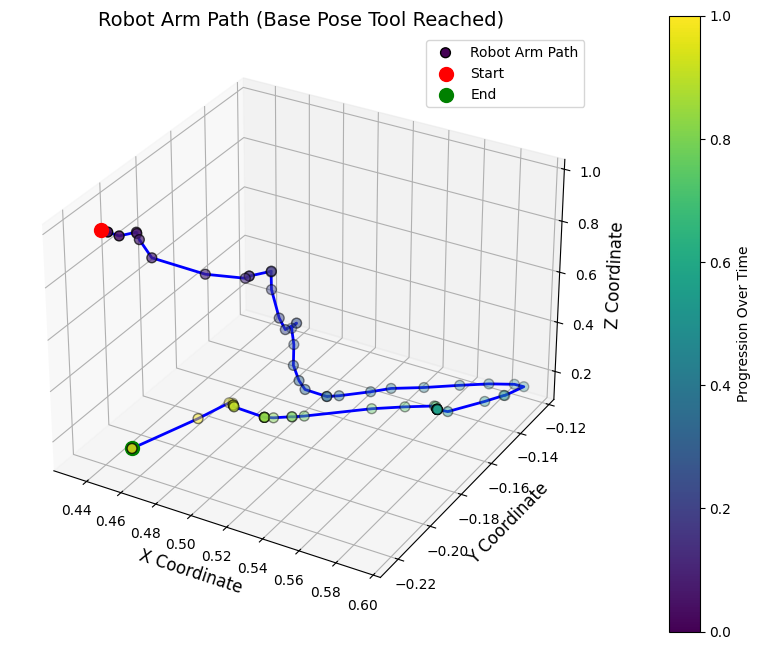

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extract all 'base_pose_tool_reached' values for the entire trajectory
base_pose_tool_reached_list = [step['observation']['base_pose_tool_reached'] for step in instance[0]['steps']]

# Separate x, y, z coordinates from all timesteps
x = [pose[0] for pose in base_pose_tool_reached_list]
y = [pose[1] for pose in base_pose_tool_reached_list]
z = [pose[2] for pose in base_pose_tool_reached_list]

# Create a color gradient based on the length of the trajectory
colors = np.linspace(0, 1, len(x))

# Plot the robot's entire path in 3D space with color gradient
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=colors, cmap='viridis', marker='o', s=50, edgecolor='k', label='Robot Arm Path')

# Plot a continuous line along the trajectory
ax.plot(x, y, z, color='b', linewidth=2)

# Mark the starting and ending points
ax.scatter(x[0], y[0], z[0], c='red', s=100, label='Start', marker='o')  # Start point
ax.scatter(x[-1], y[-1], z[-1], c='green', s=100, label='End', marker='o')  # End point

# Labels and title
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('Robot Arm Path (Base Pose Tool Reached)', fontsize=14)

# Add colorbar to indicate progression over time
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Progression Over Time')

# Grid and legend for better readability
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


# Quaternion to Rotational Matrix Using Scipy Library and Plotting


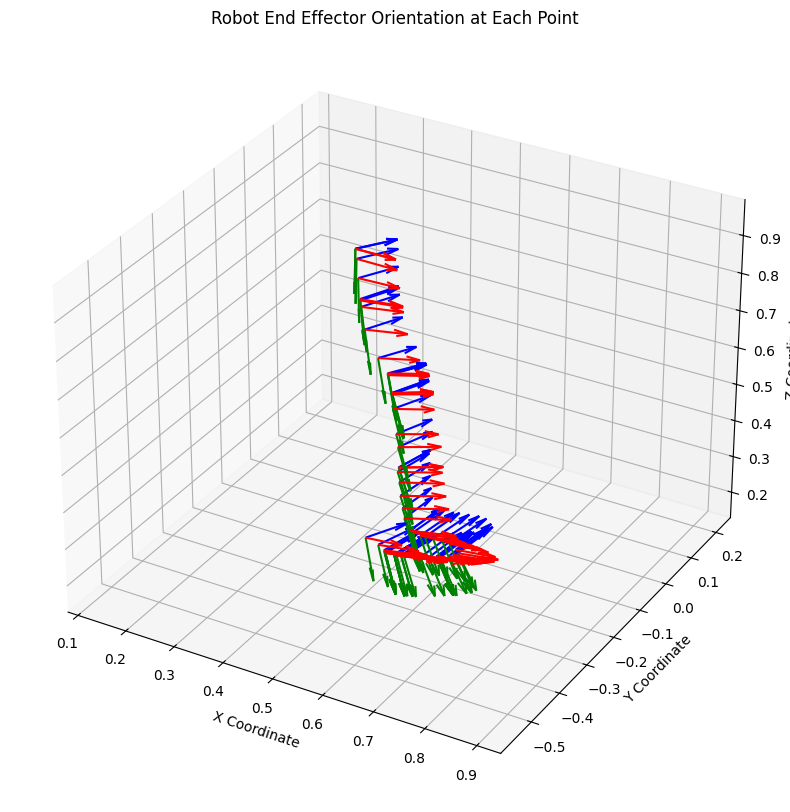

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

# Function to convert quaternion to rotation matrix using scipy
def quaternion_to_rotation_matrix_scipy(quaternion):
    """
    Convert a quaternion to a rotation matrix.

    Parameters:
    quaternion : list or array_like
        A quaternion [q_x, q_y, q_z, q_w], where q_w is the scalar component.

    Returns:
    numpy.ndarray
        A 3x3 rotation matrix.
    """
    # Create a rotation object from the quaternion (note the order of parameters)
    rotation = R.from_quat(quaternion)

    # Convert the rotation object to a rotation matrix
    rotation_matrix = rotation.as_matrix()

    return rotation_matrix

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set equal scaling for all axes
def set_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])

    max_range = max(x_range, y_range, z_range)

    x_middle = np.mean(x_limits)
    y_middle = np.mean(y_limits)
    z_middle = np.mean(z_limits)

    ax.set_xlim3d([x_middle - max_range / 2, x_middle + max_range / 2])
    ax.set_ylim3d([y_middle - max_range / 2, y_middle + max_range / 2])
    ax.set_zlim3d([z_middle - max_range / 2, z_middle + max_range / 2])

# Iterate through the list of base_pose_tool_reached to get position and quaternion
for data in base_pose_tool_reached_list:
    # Extract the position (x, y, z)
    x, y, z = data[0], data[1], data[2]

    # Extract the quaternion (q_w, q_x, q_y, q_z)
    quaternion = [data[4], data[5], data[6], data[3]]  # Reorder to [q_x, q_y, q_z, q_w]

    # Convert quaternion to rotation matrix using scipy
    rotation_matrix = quaternion_to_rotation_matrix_scipy(quaternion)

    # Define the local X, Y, Z axes in the body frame (before rotation)
    local_axes = np.identity(3)  # Identity matrix for X, Y, Z unit vectors

    # Apply the rotation matrix to the local axes to get the rotated orientation
    rotated_axes = rotation_matrix @ local_axes

    # Plot the orientation vectors (X, Y, Z axes) as arrows
    ax.quiver(x, y, z, *rotated_axes[:, 0], color='r', length=0.1, normalize=True)
    ax.quiver(x, y, z, *rotated_axes[:, 1], color='g', length=0.1, normalize=True)
    ax.quiver(x, y, z, *rotated_axes[:, 2], color='b', length=0.1, normalize=True)

# Set labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('Robot End Effector Orientation at Each Point')

# Apply equal scaling to the axes
set_axes_equal(ax)

# Show the plot
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
import os
from PIL import Image

# Function to convert quaternion to rotation matrix using scipy
def quaternion_to_rotation_matrix_scipy(quaternion):
    rotation = R.from_quat(quaternion)
    rotation_matrix = rotation.as_matrix()
    return rotation_matrix

# Create a directory to save images
output_dir = '/content/robot_orientation_frames'
os.makedirs(output_dir, exist_ok=True)

# Use previous axis limits with additional padding for a larger box around the plot
x_vals = [data[0] for data in base_pose_tool_reached_list]
y_vals = [data[1] for data in base_pose_tool_reached_list]
z_vals = [data[2] for data in base_pose_tool_reached_list]

padding = 0.15  # Increase padding slightly
x_limits = [min(x_vals) - padding, max(x_vals) + padding]
y_limits = [min(y_vals) - padding, max(y_vals) + padding]
z_limits = [min(z_vals) - padding, max(z_vals) + padding]

# Generate individual frames
for i, data in enumerate(base_pose_tool_reached_list):
    fig = plt.figure(figsize=(9, 9))  # Set a slightly larger figure size
    ax = fig.add_subplot(111, projection='3d')

    # Extract the position (x, y, z)
    x, y, z = data[0], data[1], data[2]

    # Extract the quaternion (q_w, q_x, q_y, q_z)
    quaternion = [data[4], data[5], data[6], data[3]]  # Reorder to [q_x, q_y, q_z, q_w]

    # Convert quaternion to rotation matrix
    rotation_matrix = quaternion_to_rotation_matrix_scipy(quaternion)

    # Define the local X, Y, Z axes in the body frame
    local_axes = np.identity(3)

    # Apply the rotation matrix to the local axes to get the rotated orientation
    rotated_axes = rotation_matrix @ local_axes

    # Plot the orientation vectors (X, Y, Z axes) as arrows
    ax.quiver(x, y, z, *rotated_axes[:, 0], color='r', length=0.1, normalize=True)
    ax.quiver(x, y, z, *rotated_axes[:, 1], color='g', length=0.1, normalize=True)
    ax.quiver(x, y, z, *rotated_axes[:, 2], color='b', length=0.1, normalize=True)

    # Set labels, title, and consistent axis limits with padding
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(f'Robot End Effector Orientation - Frame {i+1}')
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_zlim(z_limits)

    # Save the figure
    plt.savefig(f'{output_dir}/frame_{i:03d}.png')
    plt.close(fig)

# Compile the saved images into a GIF
frames = []
for i in range(len(base_pose_tool_reached_list)):
    frame = Image.open(f'{output_dir}/frame_{i:03d}.png')
    frames.append(frame)

# Save as a GIF
gif_path = '/content/robot_orientation_animation.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved at {gif_path}")


GIF saved at /content/robot_orientation_animation.gif


In [16]:
import numpy as np
from scipy.spatial.transform import Rotation as R

# Function to convert quaternion and positional vector to a 4x4 transformation matrix
def create_transformation_matrix(quaternion, position):
    """
    Create a 4x4 transformation matrix from a quaternion and positional vector.

    Parameters:
    quaternion : list or array_like
        A quaternion [q_x, q_y, q_z, q_w], where q_w is the scalar component.
    position : list or array_like
        A positional vector [x, y, z].

    Returns:
    numpy.ndarray
        A 4x4 transformation matrix.
    """
    # Convert quaternion to rotation matrix
    rotation_matrix = R.from_quat(quaternion).as_matrix()

    # Create the 4x4 transformation matrix
    transformation_matrix = np.eye(4)  # Start with an identity matrix
    transformation_matrix[:3, :3] = rotation_matrix  # Set the top-left 3x3 block as the rotation matrix
    transformation_matrix[:3, 3] = position  # Set the last column as the positional vector [x, y, z]

    return transformation_matrix

# Example: Loop through the base_pose_tool_reached_list
transformation_matrices = []
for data in base_pose_tool_reached_list:
    # Extract positional vector (x, y, z)
    position = [data[0], data[1], data[2]]

    # Extract quaternion (reordered to [q_x, q_y, q_z, q_w])
    quaternion = [data[4], data[5], data[6], data[3]]

    # Create transformation matrix
    transformation_matrix = create_transformation_matrix(quaternion, position)

    # Append to the list
    transformation_matrices.append(transformation_matrix)

# Print the first transformation matrix as an example
print("Example Transformation Matrix:")
print(transformation_matrices[-1])


Example Transformation Matrix:
[[ 0.90034783  0.29171248  0.32292044  0.45952243]
 [-0.26289127 -0.22673933  0.9378046  -0.22350954]
 [ 0.34678806 -0.9292433  -0.1274556   0.21572524]
 [ 0.          0.          0.          1.        ]]


In [17]:
import csv

# Save transformation matrices to a .csv file
with open("transformation_matrices.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    for i, matrix in enumerate(transformation_matrices):
        writer.writerows(matrix)  # Write the matrix
         # Add an empty row between matrices

print("Transformation matrices saved to 'transformation_matrices.csv'")


Transformation matrices saved to 'transformation_matrices.csv'


## 3D plot

In [18]:
import plotly.graph_objects as go
import numpy as np


# Extract x, y, z coordinates for all timesteps
x = [pose[0] for pose in base_pose_tool_reached_list]
y = [pose[1] for pose in base_pose_tool_reached_list]
z = [pose[2] for pose in base_pose_tool_reached_list]

# Create a color gradient based on the trajectory length
colors = np.linspace(0, 1, len(x))

# Create an interactive 3D plot
fig = go.Figure()

# Plot the robot arm's path with markers and a connecting line
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers+lines',
    marker=dict(
        size=5,
        color=colors,
        colorscale='Viridis',
        colorbar=dict(title='Progression Over Time')
    ),
    line=dict(color='blue', width=2),
    name='Robot End Effector Path'
))

# Highlight the start and end points
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='End'
))

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
    ),
    title='Interactive 3D Robot End Effector Path (Base Pose Tool Reached)',
)

# Show the plot
fig.show()


In [19]:
import plotly.graph_objects as go
import numpy as np

# Sample data for base_pose_tool_reached_list (replace with your actual data)

# Extract x, y, z coordinates from the base_pose_tool_reached_list
x = [pose[0] for pose in base_pose_tool_reached_list]
y = [pose[1] for pose in base_pose_tool_reached_list]
z = [pose[2] for pose in base_pose_tool_reached_list]

# Create the initial figure
fig = go.Figure()

# Add the path of the robot arm with a line
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines+markers',
    marker=dict(size=5, color=np.linspace(0, 1, len(x)), colorscale='Viridis'),
    line=dict(color='blue', width=2)
))

# Highlight the start and end points
fig.add_trace(go.Scatter3d(
    x=[x[0]], y=[y[0]], z=[z[0]],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[x[-1]], y=[y[-1]], z=[z[-1]],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='End'
))

# Set up initial camera position
initial_camera = dict(
    eye=dict(x=1.5, y=1.5, z=1.5)
)

fig.update_layout(
    scene_camera=initial_camera,
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate'
    ),
    title="Animated Robot Arm Path",
)

# Animation frames for camera movement
frames = []
for i in range(len(x)):
    camera = dict(
        eye=dict(x=x[i], y=y[i], z=z[i] + 0.5)  # Offset z to keep view above the path
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

# Add frames to the figure
fig.frames = frames

# Animation settings
fig.update_layout(
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=100, redraw=True),
                                                     fromcurrent=True)])
                               ])]
)

# Show the animation
fig.show()
